B.contents=[Square3::ctr@[1.5, 1.5], Square3::ctr@[1.5, 4.5], Square3::ctr@[4.5, 1.5], Square3::ctr@[4.5, 4.5], Square2::ctr@[1.0, 7.0], Square2::ctr@[3.0, 7.0], Square2::ctr@[5.0, 7.0], Square2::ctr@[7.0, 1.0], Square2::ctr@[7.0, 3.0], Square2::ctr@[7.0, 5.0], Square1::ctr@[6.5, 6.5], Square1::ctr@[6.5, 7.5], Square1::ctr@[7.5, 6.5], Square1::ctr@[7.5, 7.5]]
------------
[[ 1  1  1  2  2  2  5  5]
 [ 1  1  1  2  2  2  5  5]
 [ 1  1  1  2  2  2  6  6]
 [ 3  3  3  4  4  4  6  6]
 [ 3  3  3  4  4  4  7  7]
 [ 3  3  3  4  4  4  7  7]
 [ 8  8  9  9 10 10 11 12]
 [ 8  8  9  9 10 10 13 14]]
------------
B.y_list=[1.5, 4.5, 1.5, 4.5, 7.0, 7.0, 7.0, 1.0, 3.0, 5.0, 6.5, 7.5, 6.5, 7.5]
------------
B.x_list=[1.5, 1.5, 4.5, 4.5, 1.0, 3.0, 5.0, 7.0, 7.0, 7.0, 6.5, 6.5, 7.5, 7.5]
------------
B.center_list=['[1.5, 1.5]', '[1.5, 4.5]', '[4.5, 1.5]', '[4.5, 4.5]', '[1.0, 7.0]', '[3.0, 7.0]', '[5.0, 7.0]', '[7.0, 1.0]', '[7.0, 3.0]', '[7.0, 5.0]', '[6.5, 6.5]', '[6.5, 7.5]', '[7.5, 6.5]', '[7.5, 7.5]'

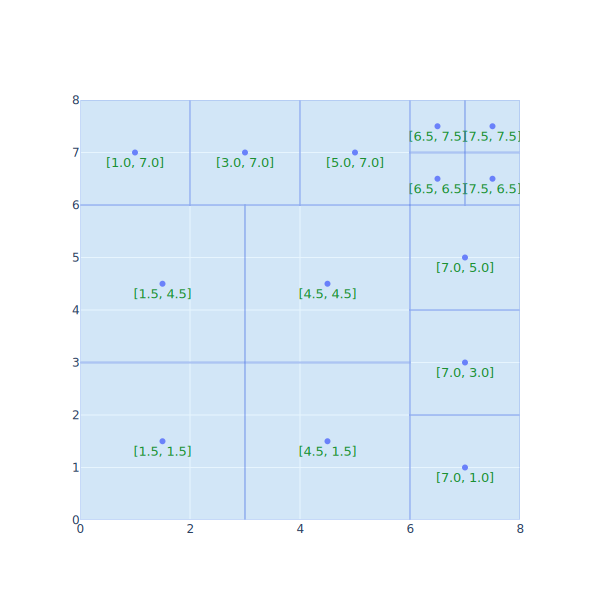

[[-1.  3.  3.  7. -1. -1.  4.  4.]
 [-1.  3.  3.  8.  9. -1.  4.  4.]
 [-1.  5.  5. -1.  1.  1.  1. 10.]
 [-1.  5.  5. -1.  1.  1.  1. 11.]
 [-1.  2.  2.  2.  1.  1.  1. 12.]
 [-1.  2.  2.  2.  6.  6.  0.  0.]
 [-1.  2.  2.  2.  6.  6.  0.  0.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
['[3.5, 5.5]', '[5.5, 2.5]', '[1.0, 2.0]', '[1.0, 7.0]', '[3.0, 2.0]', '[6.0, 5.0]', '[0.5, 3.5]', '[1.5, 3.5]', '[1.5, 4.5]', '[2.5, 7.5]', '[3.5, 7.5]', '[4.5, 7.5]']


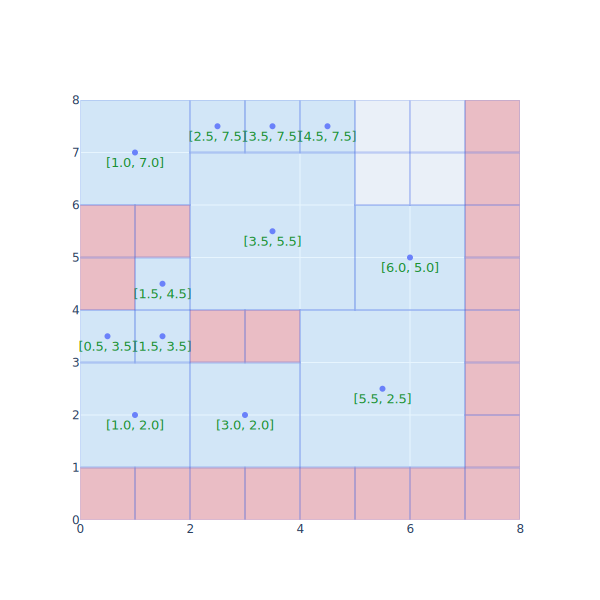

In [42]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Simple OOP based python square packing implementation.

@Author: bmetenko
@Date: 22May2022
@Links: https://github.com/bmetenko
"""

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

# pio.renderers.default = "plotly_mimetype+notebook"
pio.renderers.default = "svg"


class Square:
    def __init__(self, side):
        self.side = float(side)
        self.coordinates = [[0, 0], [0, side], [side, 0], [side, side]]  #  (x, y)

    def __repr__(self):
        return f"Square{int(self.side)}::ctr@{self.center}"

    @property
    def area(self):
        self._area = self.side**2
        return self._area

    @property
    def center(self):
        self._center = [
            (self.coordinates[0][0] + self.coordinates[3][0]) / 2,
            (self.coordinates[0][1] + self.coordinates[3][1]) / 2,
        ]
        return self._center

    def add_x(self, displacement):
        for v, _ in enumerate(self.coordinates):
            self.coordinates[v][0] += displacement

        return self.coordinates

    def add_y(self, displacement):
        for v, _ in enumerate(self.coordinates):
            self.coordinates[v][1] += displacement

        return self.coordinates

    def add_xy(self, x0, y0):
        self.add_x(x0)
        self.add_y(y0)

        return self.coordinates


class SquareCanvas:
    def __init__(self, max, contents=[], frame_override=None):
        self._contents = []
        self.x_max = max
        self.y_max = max
        self.x_min = 0
        self.y_min = 0

        if frame_override is None:
            self.frame = np.zeros((max, max), dtype=int)
        else:
            self.frame = frame_override

        for sq in contents:
            self.add_contents(sq)

        self.check_all_filled(contents)

    def add_contents(self, sq: Square):
        for (x, y), value in np.ndenumerate(self.frame):
            if value == 0:

                if x + sq.side > self.x_max:
                    continue
                if y + sq.side > self.y_max:
                    continue

                fit = check_bounds(sq, self.frame, x, y)

                if not fit:
                    continue

                self._contents.append(sq)
                sq.add_xy(x, y)
                for cellx in list(range(int(sq.side))):
                    for celly in list(range(int(sq.side))):
                        y0 = celly + y
                        x0 = cellx + x

                        self.frame[x0][y0] = int(len(self._contents))

                break

    def check_all_filled(self, contents):
        if np.amax(self.frame) != int(len(contents)):
            raise IndexError("Not all placed...")

    @property
    def x_list(self):
        return [i.center[0] for i in self.contents]

    @property
    def y_list(self):
        return [i.center[1] for i in self.contents]

    @property
    def center_list(self):
        return [str(i.center) for i in self.contents]

    @property
    def contents(self):
        return self._contents

    def generate_plotly(self):
        fig = go.Figure()

        fig.add_trace(
            go.Scatter(
                x=self.x_list,
                y=self.y_list,
                text=self.center_list,
                mode="markers+text",
                textposition="bottom center",
                textfont=dict(family="sans serif", size=13, color="green"),
            )
        )

        fig.update_xaxes(range=[0, self.x_max])
        fig.update_yaxes(range=[0, self.y_max])
        for sq in self.contents:
            fig.add_shape(
                type="rect",
                x0=sq.coordinates[0][0],
                y0=sq.coordinates[0][1],
                x1=sq.coordinates[3][0],
                y1=sq.coordinates[3][1],
                line=dict(color="RoyalBlue"),
                fillcolor="LightSkyBlue",
                opacity=0.2
            )
        
        
        for (x, y), value in np.ndenumerate(self.frame):
            if value == -1:
                fig.add_shape(
                type="rect",
                x0=x,
                y0=y,
                x1=x+1,
                y1=y+1,
                line=dict(color="RoyalBlue"),
                fillcolor="red",
                opacity=0.2
                )
            if value == 0:
                fig.add_shape(
                type="rect",
                x0=x,
                y0=y,
                x1=x+1,
                y1=y+1,
                line=dict(color="RoyalBlue"),
                fillcolor="white",
                opacity=0.2
                )

        fig.update_layout(
            width=600,
            height=600,
        )
        fig.show()


def check_bounds(sq: Square, frame: np.array, x: float, y: float):
    out = True

    for cellx in list(range(int(sq.side))):
        for celly in list(range(int(sq.side))):
            y0 = celly + y
            x0 = cellx + x

            if int(frame[x0][y0]) != 0:
                out = False
    return out


B = SquareCanvas(
    max=8,
    contents=[
        Square(i)
        for i in [
            3,
            3,
            3,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            1,
            1,
            1,
        ]
    ],
)
print(f"{B.contents=}")
print("------------")
print(f"{B.frame}")
print("------------")
print(f"{B.y_list=}")
print("------------")
print(f"{B.x_list=}")
print("------------")
print(f"{B.center_list=}")
print("------------")
B.generate_plotly()


custom_frame = np.array(
    [
        [
            -1.0,
            0,
            0,
            0,
            -1,
            -1,
            0,
            0,
        ],
        [
            -1.0,
            0,
            0,
            0,
            0,
            -1,
            0,
            0,
        ],
        [
            -1.0,
            0,
            0,
            -1,
            0,
            0,
            0,
            0,
        ],
        [
            -1.0,
            0,
            0,
            -1,
            0,
            0,
            0,
            0,
        ],
        [
            -1.0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
        ],
        [
            -1.0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
        ],
        [
            -1.0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
        ],
        [
            -1.0,
            -1.0,
            -1.0,
            -1.0,
            -1.0,
            -1.0,
            -1.0,
            -1.0,
        ],
    ]
)

C = SquareCanvas(
    max=8,
    contents=[
        Square(i)
        for i in [
            3,
            3,
            2,
            2,
            2,
            2,
            1,
            1,
            1,
            1,
            1,
            1,
        ]
    ],
    frame_override=custom_frame,
)
print(C.frame)
print(C.center_list)
C.generate_plotly()
